# KCL AI Society 2022/2023: Lab 1
by Jacob Casey (AI Lab Leader)

**Aim**
- Engineer your first AI model to recognise handwritten digits

**Objectives**
1. Prepare the data
1. Build/train a model to learn from the datasets
1. Evalute your AI model. How good is it?
1. Optimise it. How good can you get?

## 1.0 Prepare the data

In [16]:
# Import libraries for Python to work on later
import keras
from keras.datasets import mnist
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
import tensorflow
from matplotlib import pyplot as plt


### 1.1 Load the data and declare required variables

In [17]:
# Load the data and split it between train and test sets
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
num_classes = 10  #One for each digit 0 to 9
input_shape = (28, 28, 1) #Size of the image. 28 x 28 pixels in 1 dimension (e.g. an RGB image would be 28,28,3)
column_vector_size = 28*28 # 28 * 28. The resulting length if we stack all pixels next to each other, width * height.

In [ ]:
#Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

### 1.2 Visualise: Plot to inspect the digits

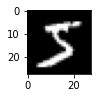

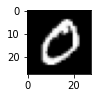

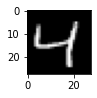

In [20]:
%matplotlib inline
from matplotlib import pyplot
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

## 2.0 Build the AI Model Arcitecture

In [23]:
model = Sequential()

# Flatten the 28x28 images into a column vector of size 1x784
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add a dense neural network that connects all 784 points of the vector to 32 new points (dimensionality reduction)
model.add(Dense(units=32, activation='sigmoid', input_shape=(784,)))

# Add another dense layer that goes from these 32 layers, to the 10 layers we need for each digit
model.add(Dense(units=num_classes, activation='softmax'))

# Display the model in a nice table below
model.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## 3.0 Run and train the AI model on the Data

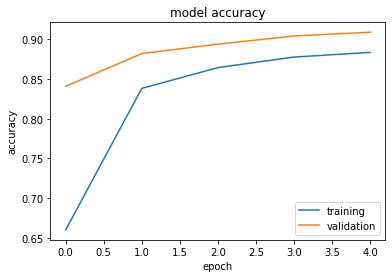

Test loss: 0.479
Test accuracy: 0.89


In [22]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_X, train_y, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(test_X, test_y, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')